In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('client_data.csv')

In [3]:
df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In the dataset there are 14606 datapoints thus we have 14606 customers

# Insights based on Numerical Columns

In [5]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


# Insights based on the data

#### Energy Consumption Patterns

### cons12m: 

cons12m (electricity consumption of the past 12 months): The consumptions has a range of 0 till 6.2 million. Mean is 159,220 which means that the average consumption is that and the data points are spread (standard deviation) of 573,465. 

Explanation: Most consumers have low consumption while there are consumers with significant high usage

(Question find the consumers of electricity with high usage, What insights can I get about them, What is meaningful to show.(max 3 charts))

### cons_gas_12m:

cons_gas_12m (gas consumption of the past 12 months): The gas consumption has a range from 0 to 4.2 million. The values are spread by 169,973 points which means that there is a high variability in the gas consumption just as the electricity consumption. 

(Question find the consumers of electricity with high usage, What insights can I get about them, What is meaningful to show.(max 3 charts))

### cons_last_month

cons_last_month(electricity consumption of the last month): It shows that the amount of consumption varies a lot from month to month for different customers. The average consumtion is 16,090 with standard deviation 64,364.


### Forecasting Data:


#### forecast_cons_12m
forecast_cons_12m: forecasted electricity consumption for next 12 months. Contains predictions for energy consumption over the next 12 months. The average electricity consumption is 1868 with a spread tendency of 2388 thus the forecast shows a high degree of uncertainty.

#### forecast_cons_year
forecast_cons_year: forecasted electricity consumption for the next calendar year. The yearly forecasted consumption has an average value of 1399 compared to the 12m month forecast which possibly can indicate another calculation methodology or forecasting method

#### forecast_discount_energy
forecast_discount_energy: forecasted value of current discount. The average value is 0.97 which means that currently this a very thin discount thus a relatively small energy discount.


# Price Forecasts:

"Peak" energy refers to the times when electricity demand is at its highest, like during the day when most people are using power for work, cooking, or heating.

"Off-peak" energy refers to times when the demand for electricity is lower, usually at night or early in the morning, when fewer people are using electricity.)\

### forecast_price_energy_off_peak vs forecast_price_energy_peak
forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
forecast_price_energy_peak = forecasted energy price for 2nd period (peak)

forecast_price_energy_off_peak and forecast_price_energy_peak: These represent the forecasted prices for off-peak and peak energy. The mean off-peak price is 0.137, while the peak price is 0.050, indicating that off-peak energy is more expensive on average than peak energy.

### Insight
It means th the electricity used during the less busy hours (off-peak) is costing more than during the busy hours (peak).


### Additional Important Metrics

### imp_cons
imp_cons = current paid consumption

The mean value of imp_cons is 152.79, with a standard deviation of 341.37, which suggests that most customers have relatively low paid consumption, but a small percentage of customers are responsible for high paid consumption.

### margin_gross_pow_ele and margin_net_pow_ele
● margin_gross_pow_ele = gross margin on power subscription
● margin_net_pow_ele = net margin on power subscription

Since the values for gross and net margins are quite close (mean of 24.57 for both), this suggests that there isn’t a significant difference between gross and net margins for most customers. As a result the first explanation can be that the  company’s overhead or additional service costs are relatively low compared to the revenue from the power subscription.

### nb_prod_act
● nb_prod_act = number of active products and services

nb_prod_act: Represents the number of active products. A mean of 1.29 suggests that most customers have a single active product, though there are some customers with more.

### For price forecasts
For price forecasts (forecast_price_energy_off_peak): The 75th percentile value (0.146) indicates that most customers are projected to pay slightly higher than the median price for off-peak energy.


# Actions Based on Insights:

Churn Management: With a churn rate of 9.7%, identifying high-risk customers (e.g., those with low engagement or high predicted consumption) could help in designing retention strategies.

Forecast Accuracy: Given the standard deviations of the forecasts (high), further refinement of the forecasting models or segmentation could improve the accuracy and personalization of predictions.

Pricing Strategy: The off-peak price is generally higher than the peak price, which might indicate a misalignment with customer usage patterns. Offering more targeted discounts during peak hours might be more attractive.



# Insights 

In [6]:
df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

 The dataset is cleaned

# Distribution of Customer per product:
Here I am doing a research to find how many customers have more than one product and how many have 1 product

In [7]:
product_distribution = df['nb_prod_act'].value_counts().sort_index()

In [8]:
print(product_distribution)

nb_prod_act
1     11431
2      2445
3       523
4       150
5        31
6         8
8         4
9        11
10        2
32        1
Name: count, dtype: int64


3-5 Products:
Likely represent high-value households or small businesses.
They might purchase multiple services (e.g., electricity, gas, maintenance packages, energy efficiency tools).

6+ Products:
Could represent large businesses or institutions with multiple properties, meters, or advanced energy solutions.

Outlier Cases (e.g., 32 Products):
Likely an enterprise or a rare situation, such as a customer managing multiple properties, meters, or specialized accounts through your company.

### Visualization

C:\Users\user\AppData\Local\Temp\ipykernel_14088\1013593735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_distribution.index, y=product_distribution.values, palette="viridis")


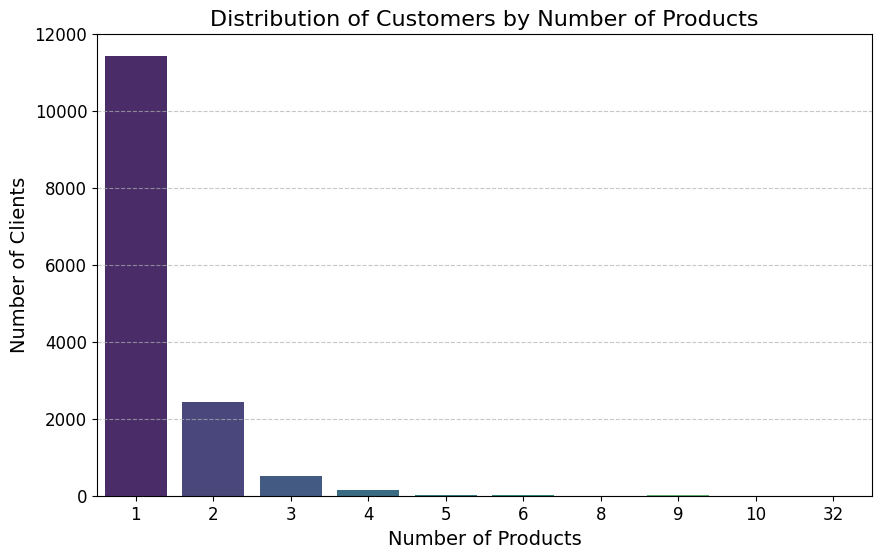

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x=product_distribution.index, y=product_distribution.values, palette="viridis")
plt.title('Distribution of Customers by Number of Products', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Number of Clients', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most of the clients have 1 or 2 product thus we can assume that the majority has electricity or gas a product

These customers represent an opportunity for cross-selling. For example, if they only have electricity, you can offer them competitive or bundled gas plans to encourage them to add the second product.

Product customer with 2 products: This is an ideal scenario, as they are more embedded in your services. These customers are likely more loyal and generate higher revenue.

### Retention:

1-product customers are likely more vulnerable to churn because:
They might have fewer reasons to stay with your company.
They could easily switch providers for their single product if a competitor offers a better deal.

2-product customers are likely stickier:
They have more at stake when switching providers.
Ensure their experience is seamless to maintain loyalty.


# Hypothesis: Investigate whether customers with fewer products or lower net margins are more likely to churn.

Setting the hypothesis:
1. Hypothesis 1: Customers with fewer products are more likely to churn.

In [10]:
# Identify the churn rate based on the churn column 
product_churn_rate = df.groupby('nb_prod_act')['churn'].mean() * 100
print(product_churn_rate)

nb_prod_act
1      9.981629
2      8.507157
3      9.942639
4     10.000000
5      9.677419
6      0.000000
8      0.000000
9      0.000000
10     0.000000
32     0.000000
Name: churn, dtype: float64


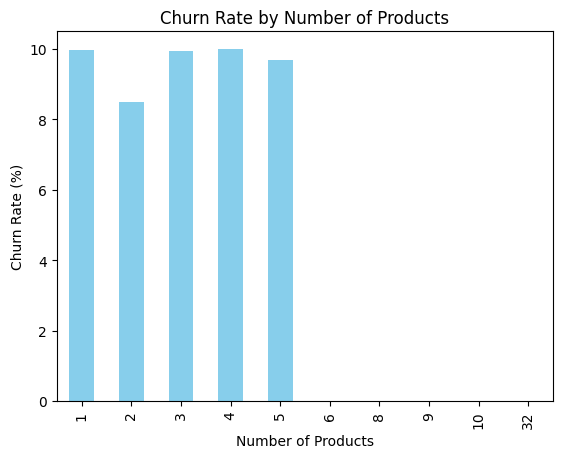

In [11]:
product_churn_rate.plot(kind='bar', color='skyblue')
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate (%)')
plt.show()

Futher research number of churn customers by product

In [12]:
product_churns = df[df['churn'] == 1].groupby('nb_prod_act').size()
print(product_churns)

nb_prod_act
1    1141
2     208
3      52
4      15
5       3
dtype: int64


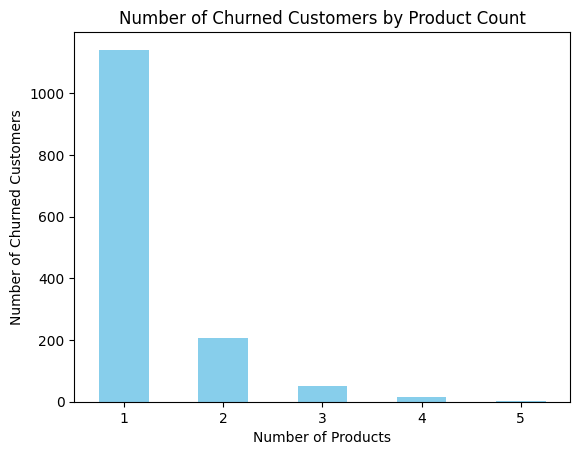

In [13]:
product_churns.plot(x='nb_prod_act', y='num_churned_customers', kind='bar', color='skyblue', legend=False)
plt.title('Number of Churned Customers by Product Count')
plt.xlabel('Number of Products')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=0)
plt.show()

# Insights

In our dataset it is clearly show that first our hypothesis of customer with less products have higher chance to churn may not be 100% true. 
But:
1. Most of our customers are single product or dual product clients thus more customers from these sections will leave

# Hypothesis 2: Lower Margin Customers are more likely to churn

In [14]:
df['net_margin_category'] = pd.qcut(df['net_margin'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

In [15]:
churn_rate_margin = df.groupby('net_margin_category')['churn'].mean() * 100

C:\Users\user\AppData\Local\Temp\ipykernel_14088\2307800441.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_margin = df.groupby('net_margin_category')['churn'].mean() * 100


In [16]:
print(churn_rate_margin)

net_margin_category
Low             9.364732
Medium-Low      9.148179
Medium-High     9.449466
High           10.898138
Name: churn, dtype: float64


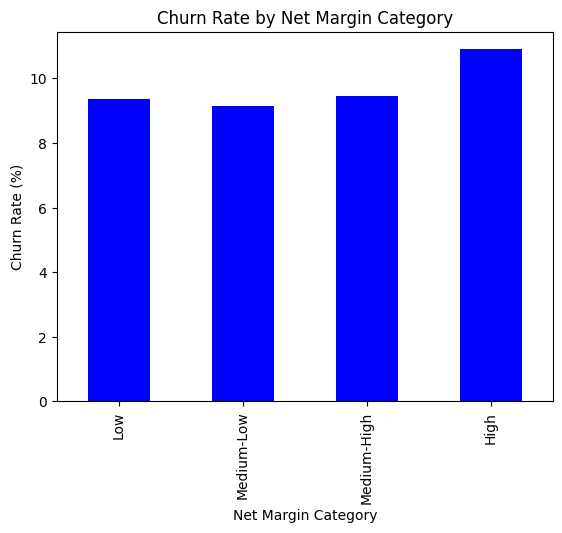

In [17]:
churn_rate_margin.plot(kind='bar', color='blue')
plt.title('Churn Rate by Net Margin Category')
plt.xlabel('Net Margin Category')
plt.ylabel('Churn Rate (%)')
plt.show()

Futher analysis finding how many clients are per number of margin

In [18]:
clients_by_margin = df['net_margin_category'].value_counts()

In [19]:
print(clients_by_margin)

net_margin_category
Low            3652
High           3652
Medium-Low     3651
Medium-High    3651
Name: count, dtype: int64


# Insights: Second hypothesis is also proved not accurate since the clients with higher margins are most likely to leave

The two highest churn rates based on net margins are in the category High and Medium High. Based on that

The churn rate increases as the net margin category increases, with the highest churn in the "High" category. This is counterintuitive because typically, higher-margin customers are expected to be more loyal.

The "High" net margin category has the highest churn rate (10.89%). This could indicate dissatisfaction among high-margin customers, despite their higher financial contribution to the company. They may have higher expectations or feel underserved.




# Which month and which season has the most clients

In [20]:
df['date_activ'] = pd.to_datetime(df['date_activ'], errors='coerce')

In [21]:
df['year'] = df['date_activ'].dt.year

In [22]:
df['month'] = df['date_activ'].dt.month

In [23]:
monthly_yearly_customers = df.groupby(['year', 'month']).size()

In [24]:
print(monthly_yearly_customers)

year  month
2003  5         1
      6         3
      7         8
      8         9
      9         1
               ..
2013  7        19
      8         7
      10        2
      11        2
2014  9         1
Length: 123, dtype: int64


#### First I want to check the aggragated results (combined) number of customers only for months. Then I will check number of customer only for years

In [25]:
monthly_prospects = df['month'].value_counts()

In [26]:
print(monthly_prospects)

month
6     1437
1     1332
2     1317
12    1301
11    1300
10    1284
8     1238
7     1151
9     1099
5     1092
3     1073
4      982
Name: count, dtype: int64


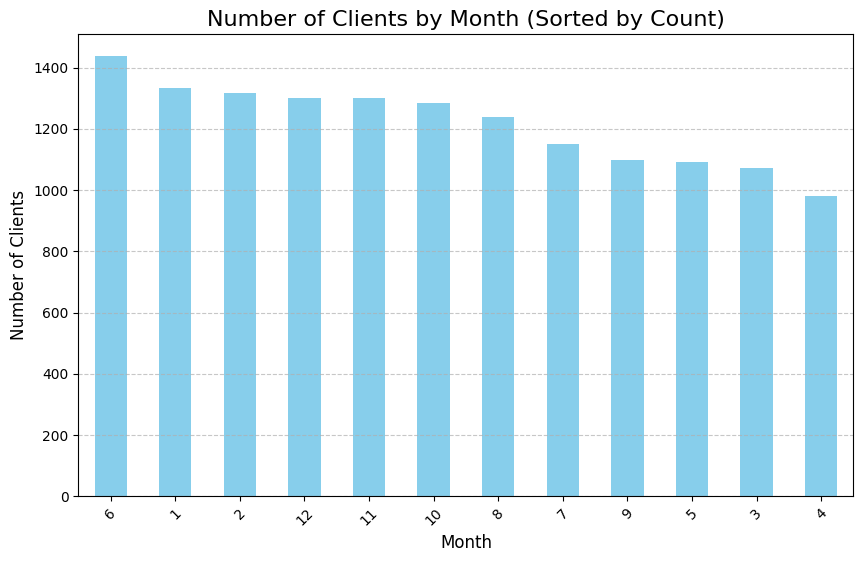

In [27]:
monthly_prospects.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of Clients by Month (Sorted by Count)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Clients', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Insights 

Based on the results a questions arises: 
1. In which month we have the most churners
2. Is there a seasonality trend in the data are there more client acquisitions during the summer or winter months
3. In which season are more clients churning

# Summer months

In June there is the month with the most customers indicating that there is a spike during the Summer month due to the need of air conditioning, heat, etc

Other summer months like July (7) and August (8) have moderate subscription numbers, possibly reflecting steady demand in this period.

# Winter months

December (12), January (1), and February (2) have consistently high numbers of subscriptions, that can explain the seasonality trend that in winter months there is more energy consumption thus we convert more clients there.

October (10) and November (11) show slightly higher subscriptions, potentially tied to preparation for winter or contract renewals during these months.



# Find out based on the Trends uncovered in which month we the client has acquired more customers. Now I want to find in which month we have more customers leaving

In [28]:
monthly_churners = df[df['churn'] == 1]['month'].value_counts()

In [29]:
print(monthly_churners)

month
6     154
1     146
2     140
10    126
11    123
8     123
12    122
3     108
5      99
7      96
4      95
9      87
Name: count, dtype: int64


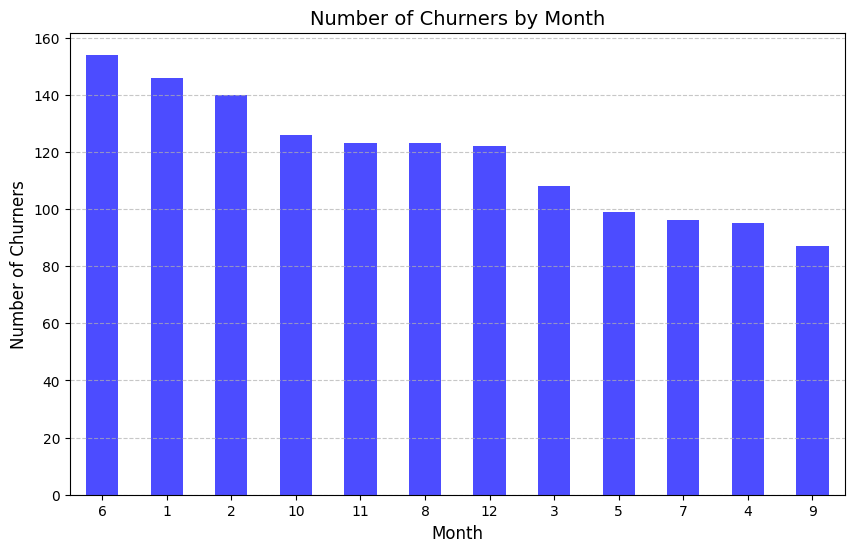

In [30]:
plt.figure(figsize=(10, 6))
monthly_churners.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Number of Churners by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Churners', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Business Insights

While june has the highest number of client acquisitions there is also the month with the most clients leaving the company

Fllowed by January (1) with 146 churners and February (2) with 140 churners which are the winter months with high conversion rate for all competitors and us including this could possibly mean

#### Reasons for churning
1. Contract expirations.
2. Seasonal dissatisfaction with services or pricing.(Higher pricing due to the increase in demand of our services)
3. Market competition offering better deals during these months with seasonal trends like the winter months or summer months.

To conclude the theory I will check the churn rate for each month

In [31]:
monthly_churn_rate = (monthly_churners / monthly_prospects) * 100

In [32]:
print(monthly_churn_rate)

month
1     10.960961
2     10.630220
3     10.065238
4      9.674134
5      9.065934
6     10.716771
7      8.340573
8      9.935380
9      7.916288
10     9.813084
11     9.461538
12     9.377402
Name: count, dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_14088\3109966551.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_churn_rate.index, y=monthly_churn_rate.values, palette="viridis")


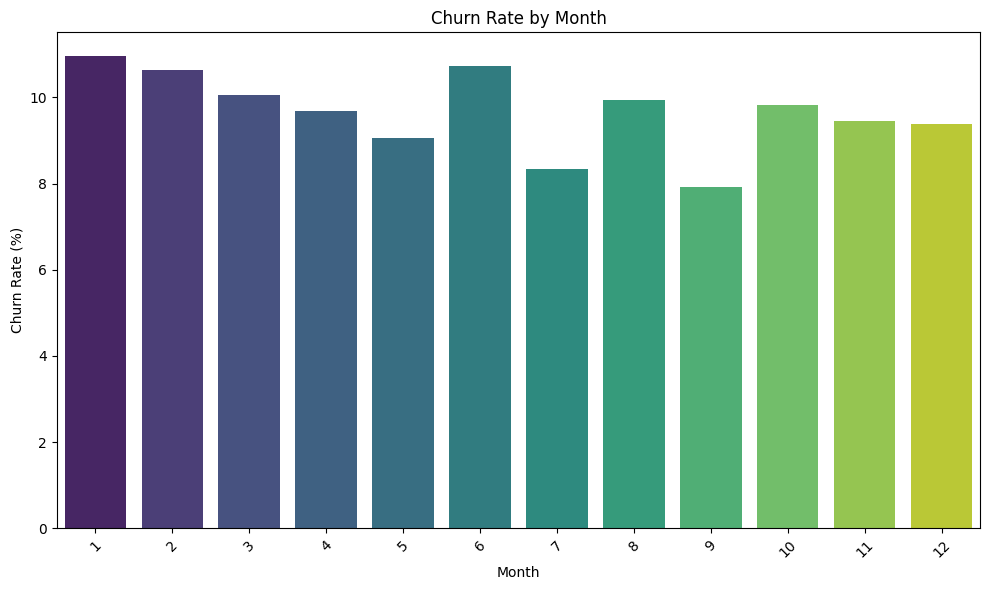

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_churn_rate.index, y=monthly_churn_rate.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Churn Rate (%)")
plt.title("Churn Rate by Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Insights
The months with high possibility of churning remain the winter months, the months before winter and June while the values are very close thus we can assume there is no seasonality trend it is still as stated above that the customers:
1. May have not been satisfied with our service during the months with high demand
2. Our client prices might have been higher due to the increase in customer acquisitions

# I want to check how many customer have gas vs how many have electricity products

In [34]:
gas_clients = df['has_gas'].value_counts()

In [35]:
print("Customers who have gas sevices:")
print(gas_clients)

Customers who have gas sevices:
has_gas
f    11955
t     2651
Name: count, dtype: int64


# Insights
This is a boolean value that f means false and that could lead to the assumption that 11955 have electricity and 2651 have gas

### Visualization

In [36]:
client_percent = gas_clients / gas_clients.sum() * 100

In [37]:
labels = ['Gas Product', 'Electricity Product']
sizes = [client_percent['t'], client_percent['f']]
colors = ['#66b3ff', '#ff9999']

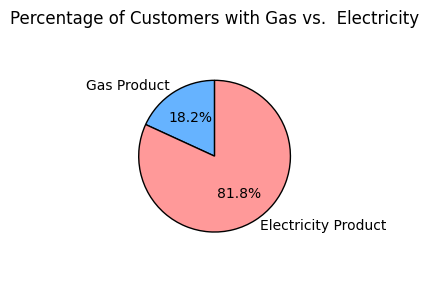

In [38]:
plt.figure(figsize=(3, 3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Percentage of Customers with Gas vs.  Electricity')
plt.axis('equal')  # pie drawn as a circle.

# Show the plot
plt.tight_layout()
plt.show()

# Business Insights:

Questions: Which type of clients are churning the most Gas or Electricity Products clients

## Large majority of customers use electricity:
The vast majority (81.8%) of your customers have electricity as their primary utility. This could reflect the general trend that electricity is a more common utility than gas in the clients market, or it may indicate a higher number of customers who only require electricity services.



# Churn Rate by Client Service: Investigate whether electricity or Gas client

In [39]:
gas_churn_rate = df[df['has_gas'] == 't']['churn'].mean()
elec_churn_rate = df[df['has_gas'] == 'f']['churn'].mean()

In [40]:
print(f"Churn rate for Gas clients: {gas_churn_rate * 100:.2f}%")
print(f"Churn rate for Electricity clients: {elec_churn_rate * 100:.2f}%")

Churn rate for Gas clients: 8.19%
Churn rate for Electricity clients: 10.05%


# Visualization

In [41]:
churn_probability = [gas_churn_rate, elec_churn_rate]
labels = ['Gas Clients', 'Electricity Clients']

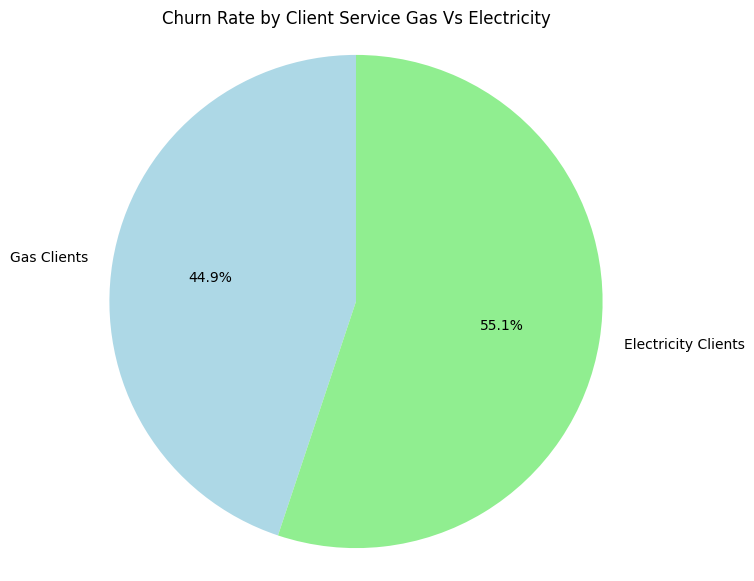

In [42]:
plt.figure(figsize=(7, 7))
plt.pie(churn_probability, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Churn Rate by Client Service Gas Vs Electricity')
plt.axis('equal')  # pie chart is circular.
plt.show()

# Insights & Strategy

Currently the electricity clients are more likely to churn. For the PowerCo this could mean:
1. Electricity pricing may be perceived as less competitive compared to gas, leading customers to switch providers more often for electricity.
2. If customers find gas services more affordable or stable, they may be more loyal, while electricity pricing fluctuations could cause dissatisfaction and higher churn.
3. The electricity market may have higher competition, with more players offering better deals, loyalty programs, or incentives. This would make customers more likely to switch electricity providers than gas providers.
4. Electricity services might be viewed as more replaceable (e.g., more options for solar, wind, or other energy sources), making it easier for customers to churn.
5. Customers in the gas sector may have longer-term contracts, which can reduce churn by locking customers in for extended periods.
6. Electricity consumption can be seasonal (e.g., higher usage during hot summers or cold winters), and if customers experience high electricity costs during peak seasons, they might churn once the seasonal demand is over.


# Investigate which clients are leaving those with high or those with low consumption

In [43]:
df['imp_cons']

0         0.00
1         0.00
2         0.00
3         0.00
4        52.32
         ...  
14601     0.00
14602    15.94
14603    18.05
14604     0.00
14605     0.00
Name: imp_cons, Length: 14606, dtype: float64

In [44]:
df['imp_cons'].describe()

count    14606.000000
mean       152.786896
std        341.369366
min          0.000000
25%          0.000000
50%         37.395000
75%        193.980000
max      15042.790000
Name: imp_cons, dtype: float64

### Based on the data at hand I want to categorize the clients to High, Medium and Low Consumers

In [45]:
# Descriptive statistics
min_val = 0
q1 = 0   # 25th percentile (Q1)
median = 37.395
q3 = 193.980  # 75th percentile (Q3)
max_val = 15042.79

In [46]:
def label_consumption(consumption):
    if consumption == 0:
        return 'Low'
    elif consumption <= q1:  # Below or equal to 25th percentile
        return 'Low'
    elif consumption <= median:  # Between 25th percentile and median
        return 'Medium'
    elif consumption <= q3:  # Between median and 75th percentile
        return 'Medium'
    else:  # Above 75th percentile
        return 'High'

In [47]:
df['consumption_label'] = df['imp_cons'].apply(label_consumption)

In [48]:
customer_per_segment = df['consumption_label'].value_counts()

In [49]:
customer_per_segment

consumption_label
Low       6169
Medium    4785
High      3652
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_14088\2089437591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_per_segment.index, y=customer_per_segment.values, palette='viridis')


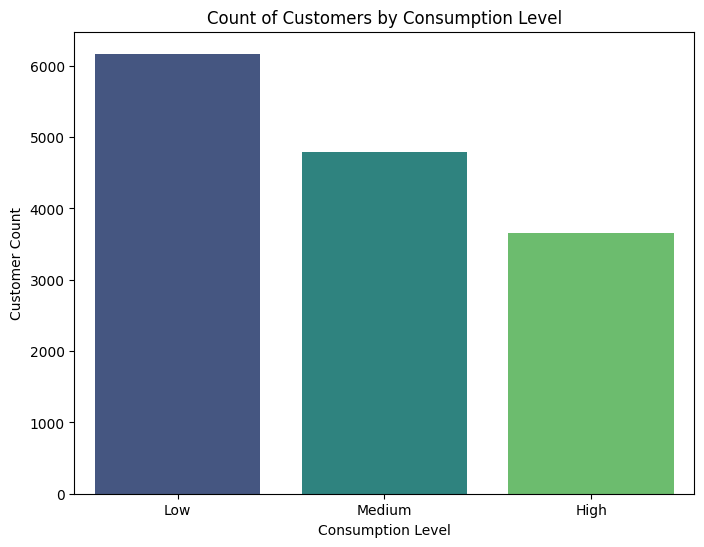

In [50]:
# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_per_segment.index, y=customer_per_segment.values, palette='viridis')
plt.title('Count of Customers by Consumption Level')
plt.xlabel('Consumption Level')
plt.ylabel('Customer Count')
plt.show()

# Business Insights:
1. Low Consumption Group: Large base, low profitability, but crucial for retention and growth.
2. Medium Consumption Group: Balanced, important for long-term business stability, potentially profitable.
3. High Consumption Group: Smaller base, but highly profitable. Requires targeted offers and customer retention strategies.

Most of our clients seem to be Low consumers which have low bills for our products. Medium consumers and high seem to be lower in number thus we can assume our Client has more household customers than enterprises or the we have more low consumption enterprises.

## Investigating which type of those three are more likely to churn

In [51]:
churn_rates = df.groupby('consumption_label')['churn'].mean()

In [52]:
churn_rates

consumption_label
High      0.095290
Low       0.092722
Medium    0.104284
Name: churn, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_14088\779175457.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='viridis')


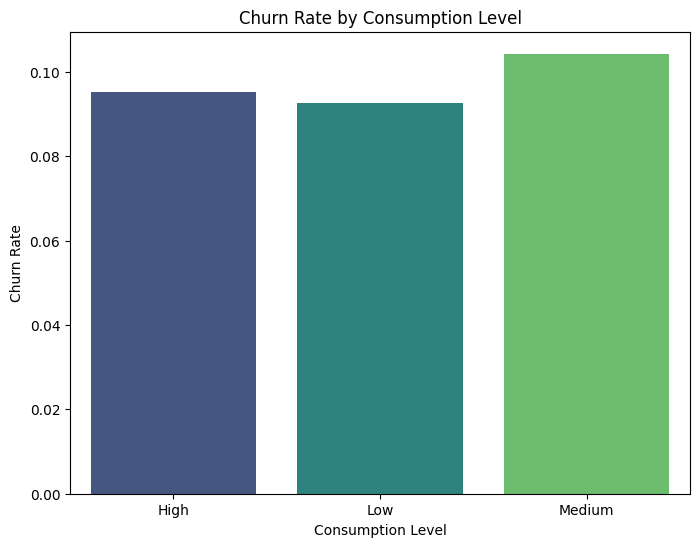

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rates.index, y=churn_rates.values, palette='viridis')
plt.title('Churn Rate by Consumption Level')
plt.xlabel('Consumption Level')
plt.ylabel('Churn Rate')
plt.show()

## Insights

The group with the highest probability of leaving is the Medium consumers and then the High which means that our Clients most profitable segments have more reasons to leave the company for a competitor.

### Since we are investigating pricing I want to check whether a discount plays a role in churns. I will do the same as above creating buckets based on statistics and then find based on the buckets which type of customers are churning the most

In [54]:
df['forecast_discount_energy'].unique()

array([ 0., 30., 24., 28., 26., 22., 10.,  5., 25., 19., 17., 23.])

In [55]:
df['forecast_discount_energy'].describe()

count    14606.000000
mean         0.966726
std          5.108289
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: forecast_discount_energy, dtype: float64

In [56]:
### Create the buckets for the discounts

In [57]:
def label_discount(discount):
    if discount == 0:
        return 'Low'
    elif discount <= 5:  # Small discount (Low to Medium range)
        return 'Medium'
    else:  # Higher discount
        return 'High'

In [58]:
df['discount_label'] = df['forecast_discount_energy'].apply(label_discount)

In [59]:
## Number of customers per segment
customer_segments = df['discount_label'].value_counts()

In [60]:
customer_segments

discount_label
Low       14094
High        511
Medium        1
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_14088\3617883266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_segments.index, y=customer_segments.values, palette='viridis')


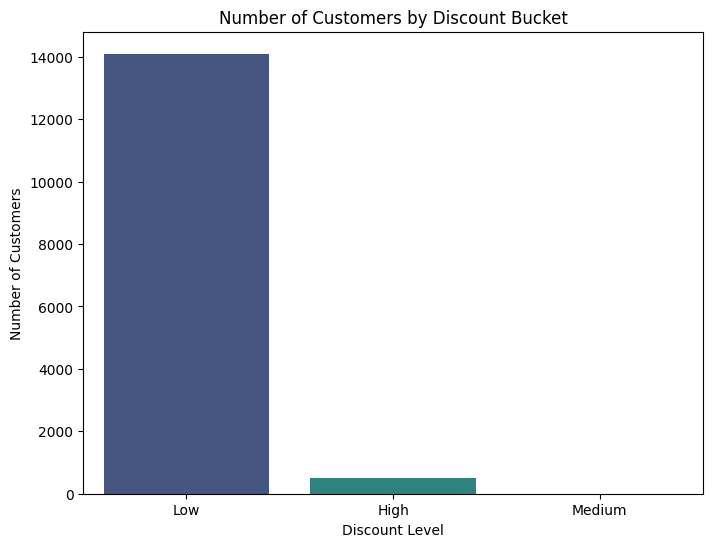

In [61]:
plt.figure(figsize=(8, 6))
sns.barplot(x=customer_segments.index, y=customer_segments.values, palette='viridis')
plt.title('Number of Customers by Discount Bucket')
plt.xlabel('Discount Level')
plt.ylabel('Number of Customers')
plt.show()


# Insights

1. Since most of the customers are in the Low group it means that our client does not make any discounts to most of the customers
2. The High group is the proportion of customer who is receaving 10% or more discounts, they can be loyal customers or long term customer or high consumers
3. The medium group has 1 entry suggesting that under 10% discount is only one customer.

# Strategy for customer retention:
1. This large base could also represent an opportunity for personalized promotions, discounts for loyalty, or introducing tiered discount programs to increase customer satisfaction or retention.
2.  It's important to monitor this group for churn, as high discounts can sometimes indicate customers with special agreements. We might want to ensure that these customers remain loyal by offering retention-focused campaigns or better customer service.
  

## As a follow up it is useful to check which type of clients will the have the highest probability of Churning

In [62]:
discount_churning = df.groupby('discount_label')['churn'].mean() * 100

In [63]:
discount_churning

discount_label
High      12.524462
Low        9.614020
Medium     0.000000
Name: churn, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_14088\2204513106.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_churning.index, y=discount_churning.values, palette='coolwarm')


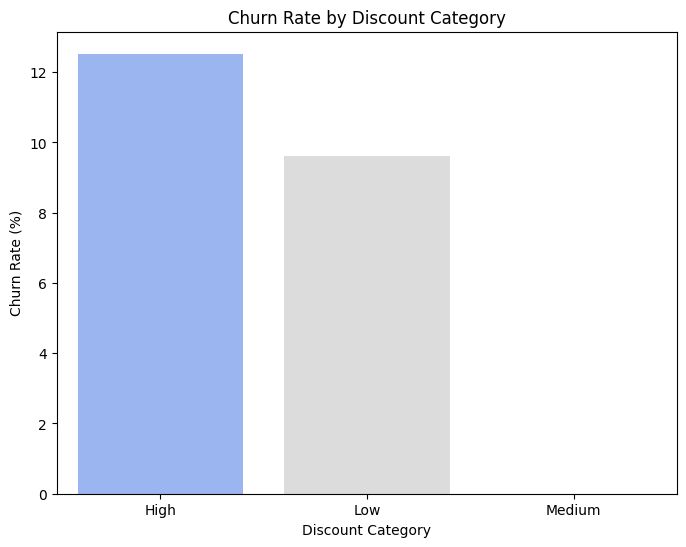

In [64]:
plt.figure(figsize=(8, 6))
sns.barplot(x=discount_churning.index, y=discount_churning.values, palette='coolwarm')
plt.title('Churn Rate by Discount Category')
plt.xlabel('Discount Category')
plt.ylabel('Churn Rate (%)')
plt.show()

# Insights

It seems that the discount does not have any correlation to the Churn Rate because the client base with high discounts has a higher chance to leave. his suggests that offering higher discounts does not necessarily guarantee customer retention, and may even indicate dissatisfaction or other factors.

While the low group show less potential to leave for a competitor, while less prone to churn, might benefit from targeted efforts to improve loyalty and satisfaction.

# Utilize the electricity consumption for the 12 months to check the count per customer segment High, Medium, Low

In [65]:
df['cons_12m'].unique()

array([    0,  4660,   544, ..., 87146, 32270,  7223], dtype=int64)

In [66]:
df['cons_12m'].describe()

count    1.460600e+04
mean     1.592203e+05
std      5.734653e+05
min      0.000000e+00
25%      5.674750e+03
50%      1.411550e+04
75%      4.076375e+04
max      6.207104e+06
Name: cons_12m, dtype: float64

# Since I am exploring the pricing I want to check the number of customers again using buckets High, Medium, Low for Electricity Consumption.
### I want to check whether high or low level electricity consumption clients are more likely to leave our Client

In [67]:
# buckets based on the percentiles and statistics
low_thresh = df['cons_12m'].quantile(0.25)  # 25th percentile
high_thres = df['cons_12m'].quantile(0.75)  # 75th percentile

In [68]:
# create the buckets:
df['consumption_bucket'] = pd.cut(df['cons_12m'], 
                                  bins=[-float('inf'), low_thresh, high_thres, float('inf')], 
                                  labels=['Low', 'Medium', 'High'])

In [69]:
# Count of customers per bucket
electricity_client_segments = df['consumption_bucket'].value_counts()

In [70]:
electricity_client_segments

consumption_bucket
Medium    7302
Low       3652
High      3652
Name: count, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_14088\2075170849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=electricity_client_segments.index, y=electricity_client_segments.values, palette='coolwarm')


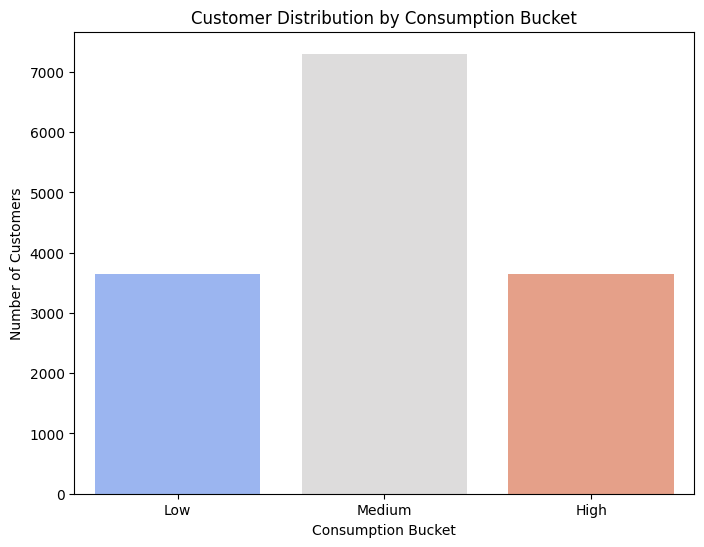

In [71]:
plt.figure(figsize=(8, 6))
sns.barplot(x=electricity_client_segments.index, y=electricity_client_segments.values, palette='coolwarm')
plt.title('Customer Distribution by Consumption Bucket')
plt.xlabel('Consumption Bucket')
plt.ylabel('Number of Customers')
plt.show()

# Insights

Most of the customers from Power Co company who are using electricity have Medium consumption while for high and low the number is the same

# Lets check the churn rate

In [72]:
churn_rate_by_bucket = df.groupby('consumption_bucket')['churn'].mean() * 100

C:\Users\user\AppData\Local\Temp\ipykernel_14088\1295882240.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_bucket = df.groupby('consumption_bucket')['churn'].mean() * 100


C:\Users\user\AppData\Local\Temp\ipykernel_14088\2380712567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_rate_by_bucket.index, y=churn_rate_by_bucket.values, palette='coolwarm')


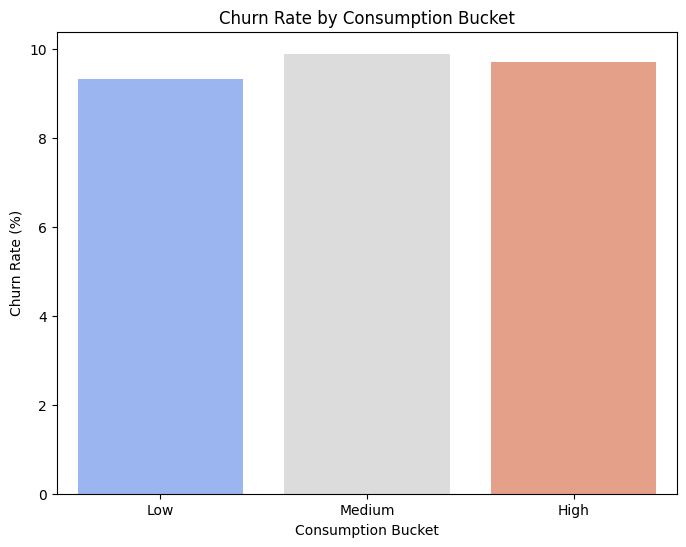

In [73]:

plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_bucket.index, y=churn_rate_by_bucket.values, palette='coolwarm')
plt.title('Churn Rate by Consumption Bucket')
plt.xlabel('Consumption Bucket')
plt.ylabel('Churn Rate (%)')
plt.show()

# Business Insights

The two higher categories Medium and High consumers are more likely to churn our company. While the low consumption clients have less probability to churn.

#### Possible Explanations:
1. High Consumption Customers: Despite their high usage, these customers might feel dissatisfied with the service or pricing, leading to churn. It could be that they expect better pricing or better terms (such as discounts) due to their higher usage, and they might be exploring alternatives.
2. Medium Consumption Customers: These customers might not be receiving enough value for their consumption level, and might consider switching to competitors if they find better deals or services that better match their consumption needs.
3. They might be paying too much for the energy or services relative to the value they're receiving. A possible issue is a mismatch between what they're consuming and how the company structures its rates or discounts.
4. These customers might expect personalized service or quick problem resolution due to their higher usage.
5. The availability of better alternatives in the market could be influencing their decision to churn.
   

# For the consumption of gas I want to check the distribution across the buckets High, Medium, Low.

In [74]:
df['cons_gas_12m'].describe()

count    1.460600e+04
mean     2.809238e+04
std      1.629731e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.154590e+06
Name: cons_gas_12m, dtype: float64

In [75]:
bins = [0, 1, 1000, 50000, 1000000, float('inf')] 

In [76]:
labels = ['Low', 'Medium', 'High', 'Very High', 'Extreme']

In [77]:
# Create the buckets
df['cons_gas_12m_buckets'] = pd.cut(df['cons_gas_12m'], bins=bins, labels=labels)

In [78]:
# Count the number of customers in each bucket
clients_per_segment = df['cons_gas_12m_buckets'].value_counts()

In [79]:
clients_per_segment

cons_gas_12m_buckets
High         1564
Very High     775
Medium        174
Extreme        99
Low             0
Name: count, dtype: int64

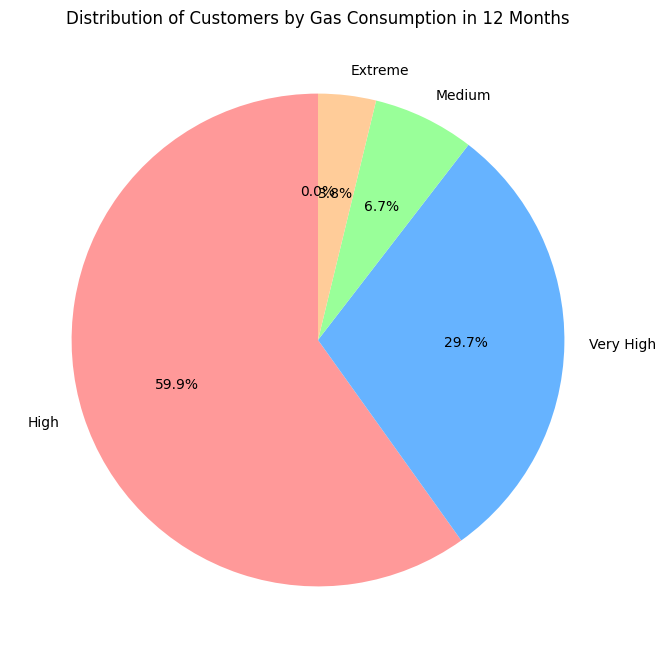

In [80]:
plt.figure(figsize=(8, 8))
clients_per_segment.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
plt.title('Distribution of Customers by Gas Consumption in 12 Months')
plt.ylabel('')  
plt.show()

# Positive and negative implications for the company

1. Most customers are in the High or Very High categories, meaning they likely have substantial consumption, which could correlate to higher revenues for PowerCo our client.

2. The absence of customers in the Low category indicates that clients are actively engaging with PowerCo service, with minimal wastage or disengagement.

3. Medium and Extreme categories provide potential targets for segmentation, marketing campaigns, or tailored offers.

The Extreme bucket, though small, might indicate outliers that could either represent very profitable clients or a small number of customers with unsustainable consumption. If the latter, this could present risks, like the potential for overuse or unmanageable cost for PowerCO.

# Important distribution Churn Column how many customers left vs how many stayed

In [81]:
# Calculate the counts for stayed and churned customers
churn_counts = df['churn'].value_counts()

In [82]:
# Extract values
stayed_count = churn_counts.get(0, 0)  # Customers who stayed
churned_count = churn_counts.get(1, 0)  # Customers who churned
total_customers = stayed_count + churned_count

In [83]:
churn_rate = (churned_count / total_customers) * 100

In [84]:
# Display the results
print(f"Number of customers who stayed: {stayed_count}")
print(f"Number of customers who churned: {churned_count}")
print(f"Total customers: {total_customers}")
print(f"Churn rate: {churn_rate:.2f}%")

Number of customers who stayed: 13187
Number of customers who churned: 1419
Total customers: 14606
Churn rate: 9.72%


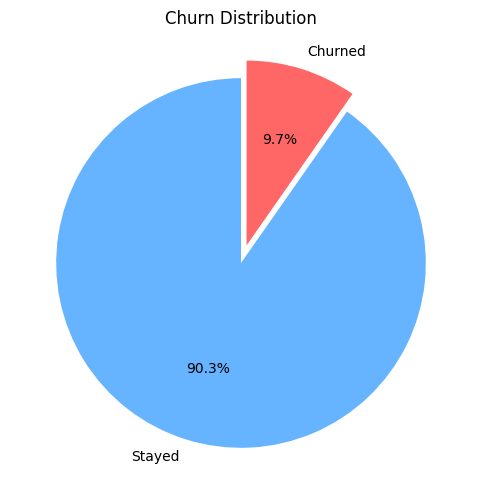

In [85]:
labels = ['Stayed', 'Churned']
sizes = [stayed_count, churned_count]
colors = ['#66b3ff', '#ff6666']
explode = (0, 0.1)  # Explode the 'Churned' slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Churn Distribution')
plt.show()

# I also want to find if the forecasted numbers play a role to the churning. 

In [86]:
df['forecast_cons_12m'].unique()

array([  0.  , 189.95,  47.96, ..., 190.39,  19.34, 762.41])

In [87]:
df['forecast_cons_12m'].describe()

count    14606.000000
mean      1868.614880
std       2387.571531
min          0.000000
25%        494.995000
50%       1112.875000
75%       2401.790000
max      82902.830000
Name: forecast_cons_12m, dtype: float64

## I will use a different approach for forecasted prices and establish 4 buckets for more transparency

In [88]:
# Statistical measures from df['forecast_cons_12m']
percentiles = [0, 0.25, 0.5, 0.75, 1.0]
bins = df['forecast_cons_12m'].quantile(percentiles).values

In [89]:
# Create bucket labels
labels = ['Very Low', 'Low', 'Medium', 'High']

In [90]:
# Create buckets based on forecast consumption
df['forecast_bucket'] = pd.cut(df['forecast_cons_12m'], bins=bins, labels=labels, include_lowest=True)

In [91]:
# Number of customers per bucket
customers_by_segment = df['forecast_bucket'].value_counts().reset_index()
customers_by_segment.columns = ['Forecast Bucket', 'Customer Count']

In [92]:
customers_by_segment

,Forecast Bucket,Customer Count
0,Very Low,3652
1,High,3652
2,Low,3651
3,Medium,3651


In [93]:
#Churn rate per bucket
churn_by_segment = df.groupby('forecast_bucket')['churn'].mean().reset_index()
churn_by_segment.columns = ['Forecast Bucket', 'Churn Rate']

C:\Users\user\AppData\Local\Temp\ipykernel_14088\581872324.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_segment = df.groupby('forecast_bucket')['churn'].mean().reset_index()


In [94]:
churn_by_segment

,Forecast Bucket,Churn Rate
0,Very Low,0.095564
1,Low,0.095590
2,Medium,0.095316
3,High,0.102136


In [95]:
results = pd.merge(customers_by_segment, churn_by_segment, on='Forecast Bucket')

In [96]:
results

,Forecast Bucket,Customer Count,Churn Rate
0,Very Low,3652,0.095564
1,High,3652,0.102136
2,Low,3651,0.095590
3,Medium,3651,0.095316


C:\Users\user\AppData\Local\Temp\ipykernel_14088\20133652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Forecast Bucket', y='Customer Count', data=results, palette='Blues_d')


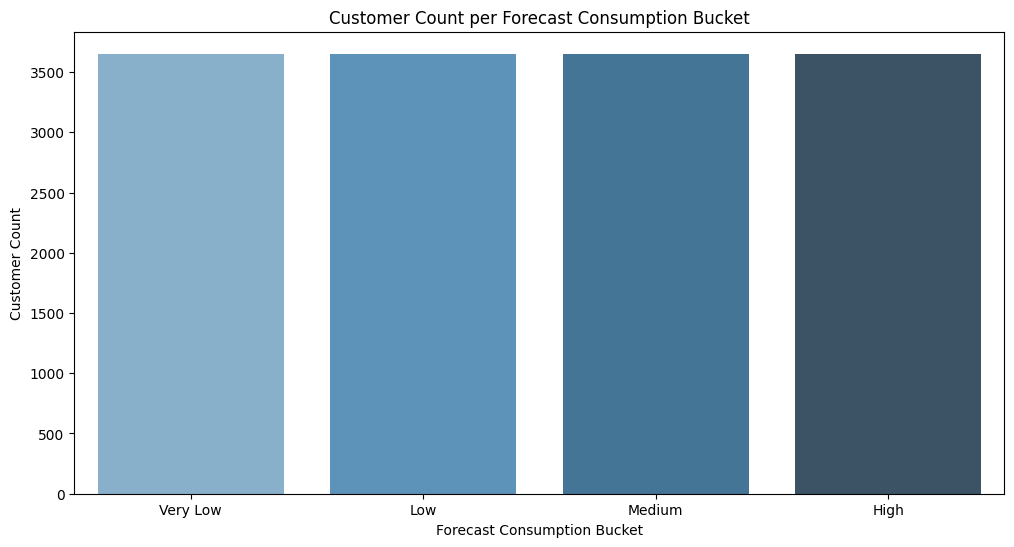

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Forecast Bucket', y='Customer Count', data=results, palette='Blues_d')
plt.title('Customer Count per Forecast Consumption Bucket')
plt.xlabel('Forecast Consumption Bucket')
plt.ylabel('Customer Count')
plt.show()

### Business Insights

There is almost a uniformity for the buckets thus I will directly check the churn probabilities

C:\Users\user\AppData\Local\Temp\ipykernel_14088\2313725787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Forecast Bucket', y='Churn Rate', data=results, palette='viridis')


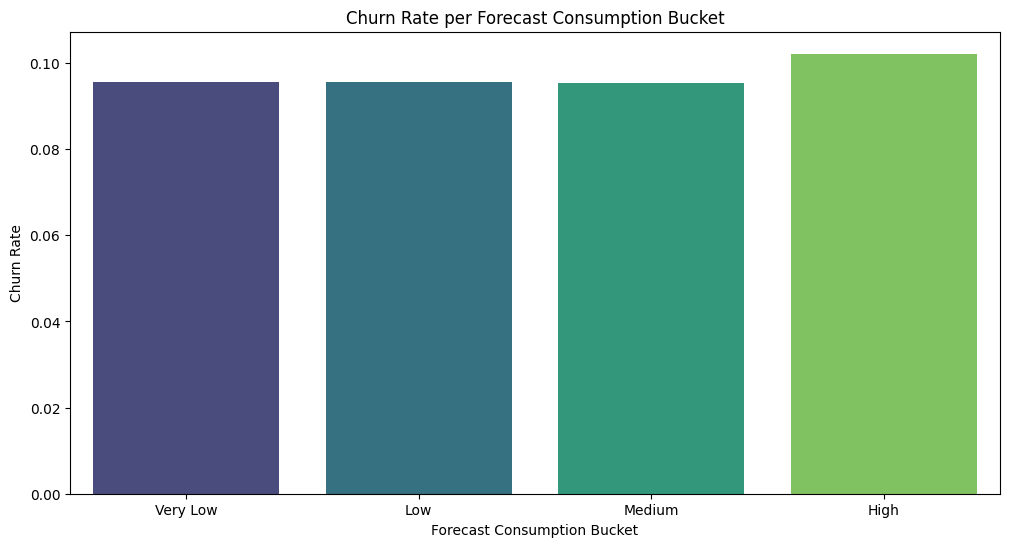

In [98]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Forecast Bucket', y='Churn Rate', data=results, palette='viridis')
plt.title('Churn Rate per Forecast Consumption Bucket')
plt.xlabel('Forecast Consumption Bucket')
plt.ylabel('Churn Rate')
plt.show()

# Business Insights

All the buckets are close but still the highest probability clients of leaving are the High forecasted consumption which can impact significantly our business financial health

All the other segments have almost equal probabilities


# Uncharted Waters Part One: Use the rolling means an essential technique for smoothing the noise in fluctuations and consumer data to identify trends

Rolling Mean: Use rolling averages to smooth out short-term fluctuations and identify longer-term trends in forecast_cons_12m or imp_cons.


In [99]:
# Create the rolling
df['forecast_cons_12m_rolling'] = df['forecast_cons_12m'].rolling(window=3, min_periods=1).mean()

In [100]:
# Create the rolling average 
df['imp_cons_rolling'] = df['imp_cons'].rolling(window=3, min_periods=1).mean()

In [101]:
# Check if rolling averages correlate with clients churning PowerCo Company
rolling_analysis = df.groupby('churn')[['forecast_cons_12m_rolling', 'imp_cons_rolling']].mean()
print("Rolling Average Analysis:")
print(rolling_analysis)

Rolling Average Analysis:
       forecast_cons_12m_rolling  imp_cons_rolling
churn                                             
0                    1864.890875        153.117798
1                    1902.882241        149.711767


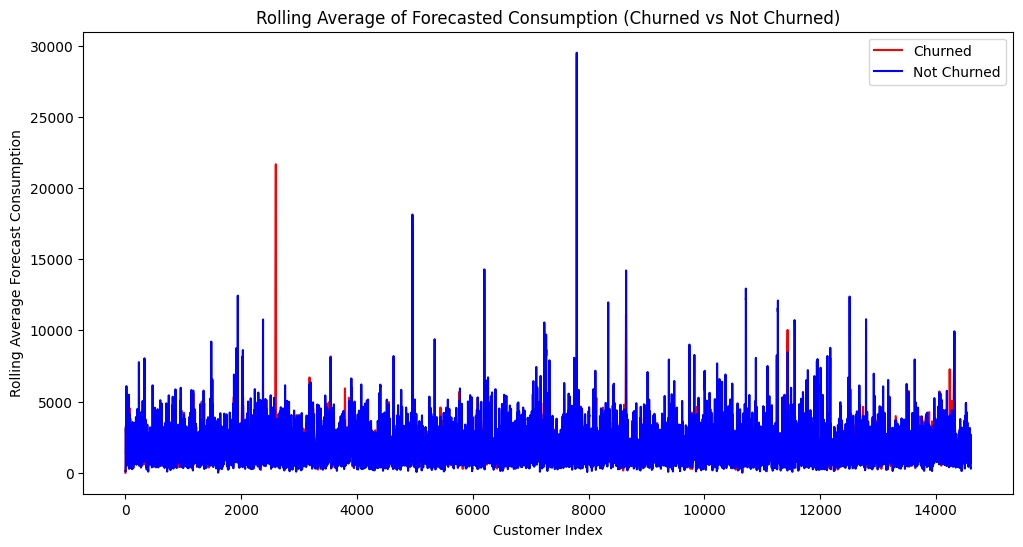

In [102]:
plt.figure(figsize=(12, 6))
df[df['churn'] == 1]['forecast_cons_12m_rolling'].plot(label='Churned', color='red')
df[df['churn'] == 0]['forecast_cons_12m_rolling'].plot(label='Not Churned', color='blue')

plt.title('Rolling Average of Forecasted Consumption (Churned vs Not Churned)')
plt.xlabel('Customer Index')
plt.ylabel('Rolling Average Forecast Consumption')
plt.legend()
plt.show()

# Business Insights (Chat GTP Helped the Plot is not useful here)

1. Churned customers have a slightly higher rolling average forecasted consumption compared to non-churned customers. This could suggest that higher forecasted usage correlates with a higher likelihood of churn, potentially due to concerns about increased costs or billing issues.

2. The rolling average for actual consumption is slightly lower for churned customers than non-churned customers. This could indicate that customers consuming less might already be disengaged or transitioning to alternative providers before fully churning.



# Correlation Section

# Create a correlation matrix to check which one of the columns has higher correlation to my churn flag

In [103]:
# Convert the categorical to numerical
label_columns = ['channel_sales', 'has_gas', 'origin_up', 'consumption_label', 'discount_label', 'consumption_bucket']
encoder = LabelEncoder()

In [104]:
for col in label_columns:
    df[col] = encoder.fit_transform(df[col])

In [105]:
# Convert datetime columns to days since activation and days until end
df['days_since_activ'] = (pd.to_datetime('today') - pd.to_datetime(df['date_activ'])).dt.days
df['days_until_end'] = (pd.to_datetime(df['date_end']) - pd.to_datetime('today')).dt.days
df['days_until_renewal'] = (pd.to_datetime(df['date_renewal']) - pd.to_datetime('today')).dt.days

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  int32         
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  object        
 7   date_modif_prod                 14606 non-null  object        
 8   date_renewal                    14606 non-null  object        
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [107]:
# Filter only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.append(pd.Index(['churn']))  # Add 'churn' to the list of numeric columns

In [108]:
correlation_matrix = df[numeric_columns].corr()

In [110]:
churn_correlation = correlation_matrix['churn']

In [111]:
correlation_matrix

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,net_margin,num_years_antig,pow_max,churn,forecast_cons_12m_rolling,imp_cons_rolling,days_since_activ,days_until_end,days_until_renewal,churn
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,...,0.133614,-0.003565,0.082889,-0.045968,0.116462,0.093987,-0.016102,-0.050728,-0.032239,-0.045968
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,...,0.070867,-0.013815,0.054317,-0.037957,0.043157,0.037970,-0.015625,0.007795,0.011751,-0.037957
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,...,0.121835,-0.003677,0.074529,-0.045284,0.105216,0.108650,-0.015533,-0.040190,-0.022838,-0.045284
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,...,0.768537,0.021283,0.393946,0.012949,0.578359,0.367753,0.016644,-0.061828,-0.070885,0.012949
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,...,0.464928,0.048248,0.309647,-0.002558,0.373626,0.556789,0.042952,-0.052610,-0.048901,-0.002558
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,...,0.079784,-0.070697,-0.005032,0.017026,0.037062,0.020700,-0.071706,-0.055145,-0.189163,0.017026
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,...,0.275830,0.071558,0.618549,0.044245,0.174276,0.128994,0.069644,-0.036436,-0.025097,0.044245
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,...,-0.135107,-0.168095,-0.384397,-0.010837,-0.075326,-0.055427,-0.166765,-0.016201,-0.078849,-0.010837
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,...,0.234942,0.080260,0.411532,0.029315,0.148040,0.124433,0.079609,-0.057716,-0.062493,0.029315
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,...,-0.072623,-0.120136,-0.095897,0.014778,-0.012833,-0.006784,-0.116464,0.042608,0.023777,0.014778


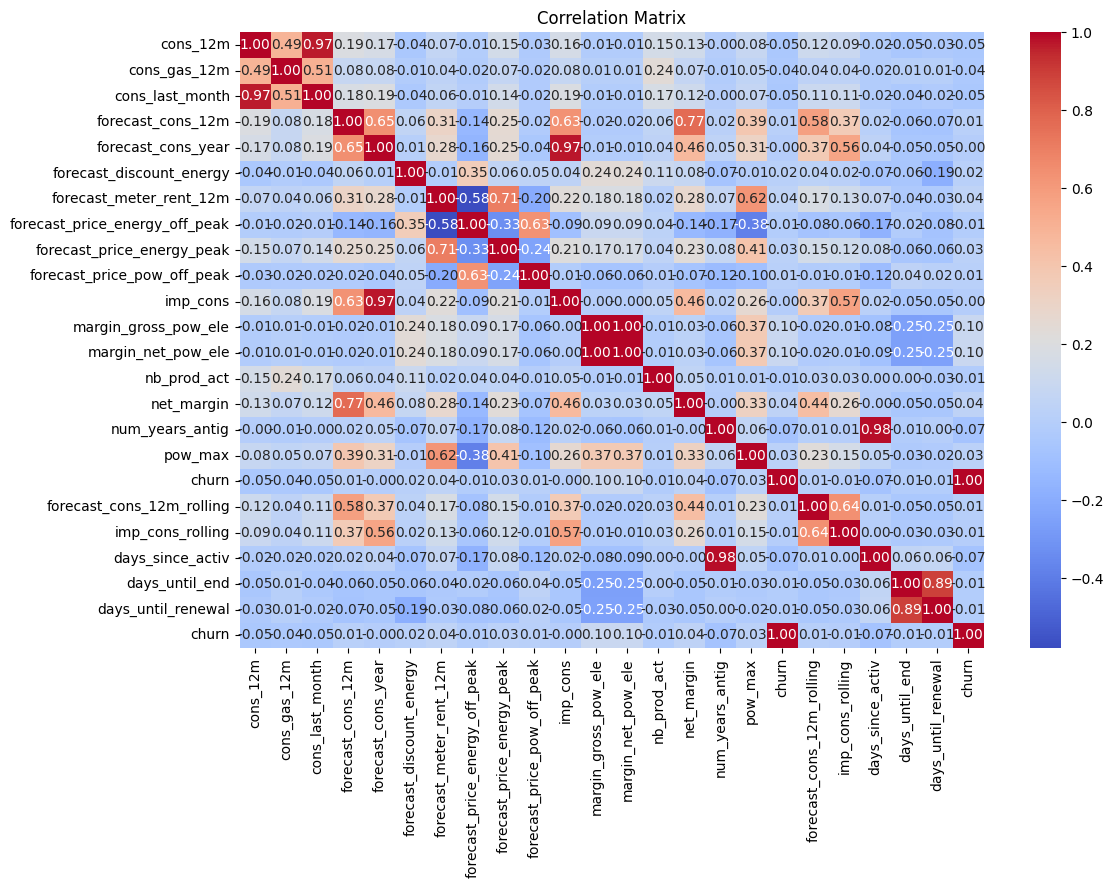

In [112]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()

# Higher Correlation Values
1. forecast_discount_energy: 0.017026
2. forecast_meter_rent_12m: 0.044245
3. net_margin: 0.041135
3. margin_gross_pow_ele: 0.095725
4. margin_net_pow_ele: 0.095772

# Client Pricing Data

In [113]:
prices = pd.read_csv('price_data.csv')

In [114]:
prices.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [115]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [116]:
prices.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# Statistical Insights

##### Variable Prices (price_off_peak_var, price_peak_var, price_mid_peak_var)

Off-Peak (Mean: 0.141): Off-peak variable prices are the highest among all periods, suggesting significant demand during this period or less incentive to reduce usage. However, the variation (std: 0.025) is relatively low, indicating stable pricing.

Peak (Mean: 0.055): Peak variable prices are lower than off-peak but have a much higher standard deviation (std: 0.050). This indicates more volatile pricing during peak periods.

Mid-Peak (Mean: 0.030): Mid-peak variable prices are the lowest but show moderate variation (std: 0.036), which could indicate less predictable pricing in this period.

Explanation: In the periods with high demand Peak we have changing prices due to the demand thus many clients with high consumption rates can easily get dissatisfied with their pricing

##### Fixed Prices (price_off_peak_fix, price_peak_fix, price_mid_peak_fix)

Off-Peak (Mean: 43.33): Off-peak fixed prices are significantly higher than the variable prices. This could mean clients are paying more for stability during this period.

Peak (Mean: 10.62): Peak fixed prices are much lower than off-peak and more volatile (std: 12.84). Some customers might not find fixed pricing attractive if it fluctuates.

Mid-Peak (Mean: 6.41): Mid-peak fixed prices are the lowest, which might be a strategic decision to encourage usage during mid-peak times.


# Trends to know
Zero Prices: The minimum price for all periods is 0. This could indicate promotional offers, billing errors, or instances where no usage was recorded.

Volatility: Variable prices are more stable than fixed prices in most periods, particularly during off-peak times. This might encourage customers to choose variable plans over fixed plans.

# Change in price_off_peak_var by each month

In [117]:
prices['price_date'] = pd.to_datetime(prices['price_date'])

In [118]:
# Extract the month
prices['year_month'] = prices['price_date'].dt.to_period('M')

In [119]:
# Group by year_month and calculate mean, median, and standard deviation for price_off_peak_var
monthly_stats = prices.groupby('year_month')['price_off_peak_var'].agg(['mean', 'median', 'std']).reset_index()

In [120]:
# Convert year_month back to datetime for plotting
monthly_stats['year_month'] = monthly_stats['year_month'].dt.to_timestamp()

In [121]:
monthly_stats

,year_month,mean,median,std
0,2015-01-01,0.142568,0.148825,0.022847
1,2015-02-01,0.142767,0.148825,0.023403
2,2015-03-01,0.143104,0.148825,0.023777
3,2015-04-01,0.143259,0.148825,0.024187
4,2015-05-01,0.143534,0.148825,0.024376
5,2015-06-01,0.143731,0.148825,0.024475
6,2015-07-01,0.143683,0.148825,0.024727
7,2015-08-01,0.137933,0.144524,0.025684
8,2015-09-01,0.137933,0.144698,0.026164
9,2015-10-01,0.137899,0.144524,0.026314


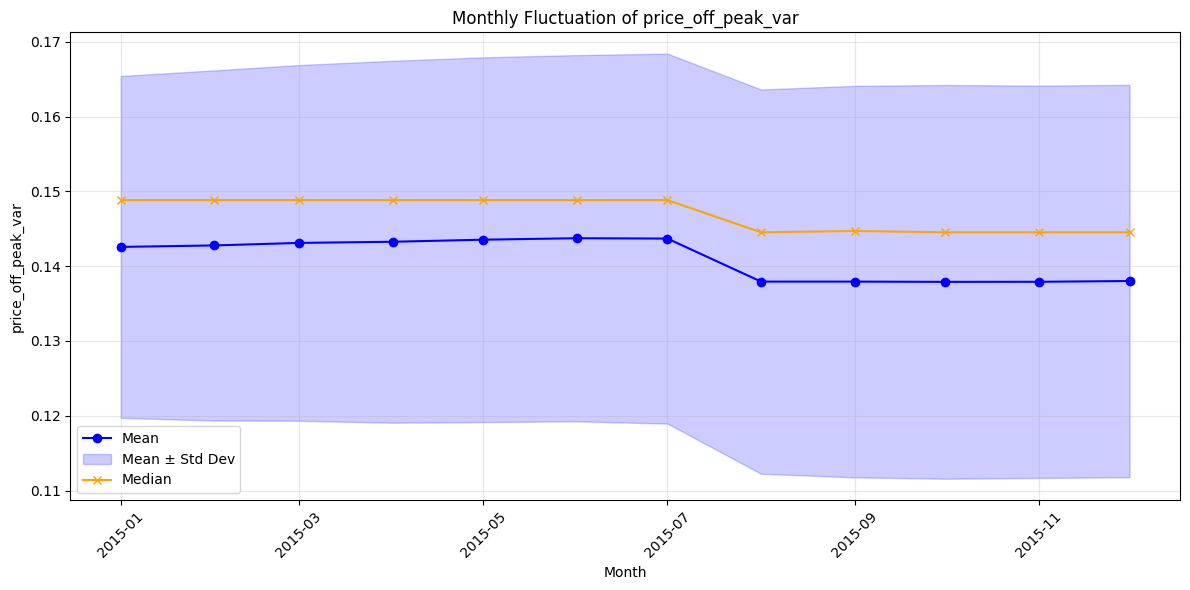

In [122]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_stats['year_month'], monthly_stats['mean'], label='Mean', marker='o', color='blue')
plt.fill_between(
    monthly_stats['year_month'],
    monthly_stats['mean'] - monthly_stats['std'], 
    monthly_stats['mean'] + monthly_stats['std'], 
    color='blue', alpha=0.2, label='Mean ± Std Dev'
)
plt.plot(monthly_stats['year_month'], monthly_stats['median'], label='Median', marker='x', color='orange')

# Add labels and legend
plt.title('Monthly Fluctuation of price_off_peak_var')
plt.xlabel('Month')
plt.ylabel('price_off_peak_var')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

# Business Insights

#### Slight Increase in Early Months (Jan–Jul 2015):
The mean price of energy starts at 0.142568 in January and rises gradually until 0.143731 in June. This increase suggests a slow, but steady, rise in energy prices during the first half of the year. This could be attributed to seasonal factors such as increased energy consumption during the winter months or market dynamics.

#### Decrease in Mid-Year (Aug–Dec 2015)
There is a noticeable drop in the mean price in August, going from 0.143731 in July to 0.137933 in August, and the price continues to remain low for the rest of the year, with the mean fluctuating between 0.137933 and 0.138011. This decline could be associated with lower energy consumption during the summer months or adjustments to seasonal demand forecasts.

# Price Changes

#### Increased Variability Mid-Year
From July to September, the standard deviation increases slightly (from 0.024727 in July to 0.026314 in October). This suggests greater volatility in the prices during the latter part of the summer and early autumn. This variability could be caused by supply and demand fluctuations, policy changes, or external market influences.

#### Stable Pricing from November–December:
By the end of the year, the standard deviation stabilizes at 0.026221 for both November and December. This indicates a reduction in price fluctuations as the year concludes, potentially reflecting a more predictable energy pricing environment.


# Seasonality Trends

#### Winter (Jan–Mar): 
The prices remain relatively steady at higher levels, with a small upward trend in March.

#### Summer (May–Aug): 
There is a dip in prices during August, and prices continue to stay low throughout the rest of the year. This suggests that there may be lower energy demand during the summer months, which could be driving prices down.

This seasonality suggests that there may be pricing advantages to marketing off-peak periods during high-demand months (e.g., winter) to manage supply-demand gaps effectively.


# Create Buckets for each price and find how many customer are per bucket off peak 

In [131]:
prices['price_off_peak_var'].describe()

count    193002.000000
mean          0.141027
std           0.025032
min           0.000000
25%           0.125976
50%           0.146033
75%           0.151635
max           0.280700
Name: price_off_peak_var, dtype: float64

In [132]:
# Define the bins from statistics
bins = [0, 0.125976, 0.146033, 0.151635, 0.280700]

In [133]:
labels = ['Low', 'Medium', 'High', 'Very High']

In [134]:
prices['price_off_peak_bucket'] = pd.cut(prices['price_off_peak_var'], bins=bins, labels=labels, include_lowest=True)

In [136]:
customers_per_segment = prices['price_off_peak_bucket'].value_counts()

In [137]:
customers_per_segment

price_off_peak_bucket
Low          52761
High         50643
Very High    45010
Medium       44588
Name: count, dtype: int64

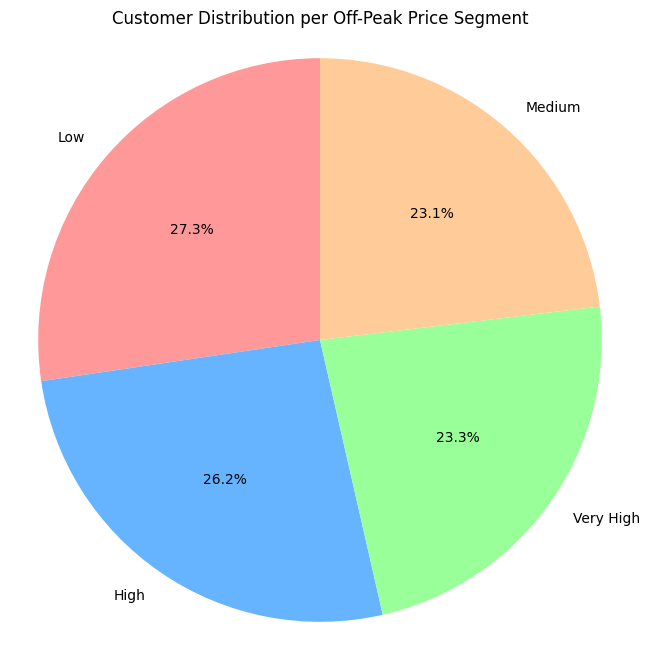

In [139]:
plt.figure(figsize=(8, 8))
plt.pie(customers_per_segment, labels=customers_per_segment.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Customer Distribution per Off-Peak Price Segment')
plt.axis('equal')  # pie chart is circular.
plt.show()

# Insights and Interpretations

#### Low Segment
Meaning: Customers in the "Low" segment are those who are paying the least amount for off-peak energy.

Interpretation: These customers are likely paying a price lower than the median price for off-peak energy. This might indicate that they are either benefiting from lower rates or are in regions where energy costs are generally lower.

Strategic Insight: If these customers have a high churn rate, it may indicate dissatisfaction despite lower prices, or they may be less likely to churn since they're paying lower rates.

#### Medium Segment

Meaning: Customers in the "Medium" segment are paying a middle-range price for off-peak energy.

Interpretation: These customers fall between the low and high price range and could be facing standard market conditions. They might not experience the benefits of the lowest prices but are not paying the highest rates either.

Strategic Insight: Customers in this segment are often at risk of switching if they find better pricing or value elsewhere. Monitoring their satisfaction and churn could be important.

#### High Segment

Meaning: Customers in the "High" segment are paying relatively higher prices for off-peak energy.

Interpretation: These customers are likely to be in regions where energy prices are higher, or they might not have access to discounted or off-peak rates. They could also be paying a premium for specific contracts or plans.

Strategic Insight: High-price customers are at risk of churn if cheaper options are available. It's important to provide value through superior service or loyalty programs to retain these customers.

#### Very High Segment
Meaning: Customers in the "Very High" segment are paying the highest prices for off-peak energy.

Interpretation: These customers might be on premium contracts or in areas with very high energy prices. They may also be facing energy supply issues or lack of competitive pricing.

Strategic Insight: These customers could be more likely to churn, especially if they feel the pricing is unjustifiable. Offering loyalty rewards, better plans, or communication about price reductions might be necessary to retain them.

# Since the distribution charts and the customer bucket charts are not giving so much information I want to check the diffrence in Prices between the fluctuated and the fix prices

In [140]:
# Calculate the differences between variable and fixed prices for each period
prices['price_off_peak_diff'] = prices['price_off_peak_var'] - prices['price_off_peak_fix']
prices['price_peak_diff'] = prices['price_peak_var'] - prices['price_peak_fix']
prices['price_mid_peak_diff'] = prices['price_mid_peak_var'] - prices['price_mid_peak_fix']

In [141]:
# Display the first few rows to check the differences
print(prices[['price_off_peak_var', 'price_off_peak_fix', 'price_off_peak_diff',
              'price_peak_var', 'price_peak_fix', 'price_peak_diff',
              'price_mid_peak_var', 'price_mid_peak_fix', 'price_mid_peak_diff']].head())

   price_off_peak_var  price_off_peak_fix  price_off_peak_diff  \
0            0.151367           44.266931           -44.115564   
1            0.151367           44.266931           -44.115564   
2            0.151367           44.266931           -44.115564   
3            0.149626           44.266931           -44.117305   
4            0.149626           44.266931           -44.117305   

   price_peak_var  price_peak_fix  price_peak_diff  price_mid_peak_var  \
0             0.0             0.0              0.0                 0.0   
1             0.0             0.0              0.0                 0.0   
2             0.0             0.0              0.0                 0.0   
3             0.0             0.0              0.0                 0.0   
4             0.0             0.0              0.0                 0.0   

   price_mid_peak_fix  price_mid_peak_diff  
0                 0.0                  0.0  
1                 0.0                  0.0  
2                 0.0  

In [142]:
# Optional: Describe the differences to understand their distribution
print(prices[['price_off_peak_diff', 'price_peak_diff', 'price_mid_peak_diff']].describe())

       price_off_peak_diff  price_peak_diff  price_mid_peak_diff
count        193002.000000    193002.000000        193002.000000
mean            -43.193450       -10.568245            -6.379488
std               5.399904        12.802186             7.738034
min             -59.169457       -36.404496           -17.367390
25%             -44.276913       -24.238904           -16.154853
50%             -44.114486         0.000000             0.000000
75%             -40.603573         0.000000             0.000000
max               0.166130         0.196782             0.076955


<Figure size 1000x600 with 0 Axes>

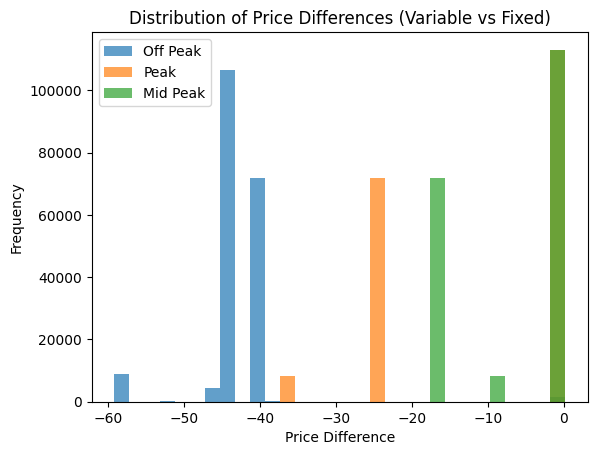

In [143]:
plt.figure(figsize=(10, 6))

# Plotting the distribution of price differences for each period
prices[['price_off_peak_diff', 'price_peak_diff', 'price_mid_peak_diff']].plot(kind='hist', bins=30, alpha=0.7)
plt.title('Distribution of Price Differences (Variable vs Fixed)')
plt.xlabel('Price Difference')
plt.ylabel('Frequency')
plt.legend(['Off Peak', 'Peak', 'Mid Peak'])
plt.show()